# Central Limit Theorem:


- This says that the mean of random samples from any population will form a bell-like curve (similar to normal distribution) even if the original data is not normally distributed...
- Practical Implementations below:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(array([2.622e+03, 1.914e+03, 1.479e+03, 1.000e+03, 7.570e+02, 5.770e+02,
        3.980e+02, 3.270e+02, 2.340e+02, 1.740e+02, 1.270e+02, 9.800e+01,
        6.900e+01, 6.700e+01, 4.500e+01, 4.200e+01, 2.000e+01, 1.000e+01,
        1.100e+01, 6.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([9.64627790e-06, 5.91839870e-01, 1.18367009e+00, 1.77550032e+00,
        2.36733054e+00, 2.95916077e+00, 3.55099099e+00, 4.14282122e+00,
        4.73465144e+00, 5.32648166e+00, 5.91831189e+00, 6.51014211e+00,
        7.10197234e+00, 7.69380256e+00, 8.28563278e+00, 8.87746301e+00,
        9.46929323e+00, 1.00611235e+01, 1.06529537e+01, 1.12447839e+01,
        1.18366141e+01, 1.24284444e+01, 1.30202746e+01, 1.36121048e+01,
        1.42039350e+01, 1.47957652e+01, 1.53875955e+01, 1.59794257e+01,
        1.65712559e+01, 1.71630861e+01, 1.77549164e+01]),
 <BarContainer object of 30 artists>)

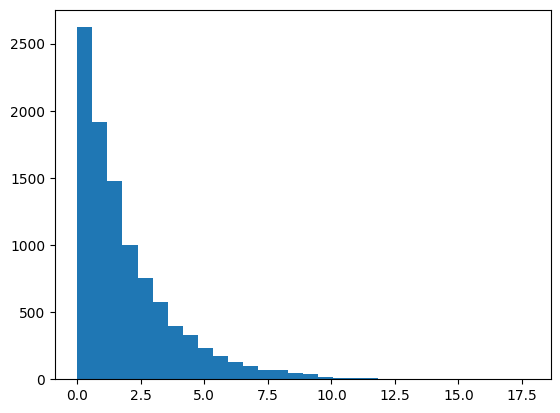

In [3]:
# Here we can see that the population is not normally distributed
population = np.random.exponential(
    scale = 2.0,
    size=10000
)
plt.hist(population, bins=30)

(array([  1.,   3.,   4.,   8.,  14.,  34.,  57.,  75., 117., 173., 237.,
        280., 370., 434., 473., 532., 537., 572., 621., 604., 619., 620.,
        576., 453., 416., 374., 319., 280., 223., 208., 196., 130., 101.,
         83.,  74.,  49.,  40.,  24.,  15.,  19.,   8.,  11.,   7.,   3.,
          3.,   1.,   0.,   0.,   0.,   2.]),
 array([0.8494219 , 0.90530277, 0.96118364, 1.01706451, 1.07294537,
        1.12882624, 1.18470711, 1.24058798, 1.29646884, 1.35234971,
        1.40823058, 1.46411145, 1.51999231, 1.57587318, 1.63175405,
        1.68763492, 1.74351578, 1.79939665, 1.85527752, 1.91115839,
        1.96703926, 2.02292012, 2.07880099, 2.13468186, 2.19056273,
        2.24644359, 2.30232446, 2.35820533, 2.4140862 , 2.46996706,
        2.52584793, 2.5817288 , 2.63760967, 2.69349053, 2.7493714 ,
        2.80525227, 2.86113314, 2.917014  , 2.97289487, 3.02877574,
        3.08465661, 3.14053747, 3.19641834, 3.25229921, 3.30818008,
        3.36406095, 3.41994181, 3.47582268, 3.

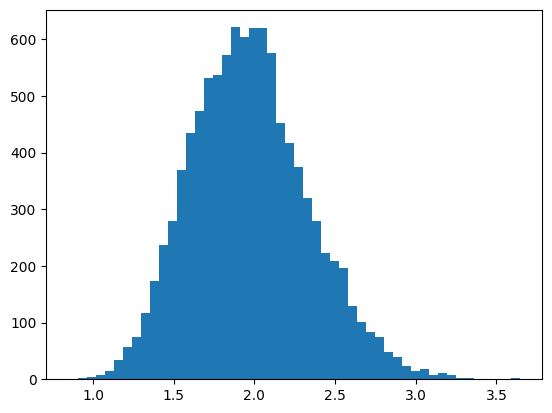

In [4]:
# Now, we can see that the means of that population is approximately normally distributed...
sample_means = [np.mean(np.random.choice(population, size=30)) for _ in range(0, population.size)]
plt.hist(sample_means, bins=50)

## Some practical Implementations of CLT in ML:

- Model Performance estimation: [distribution of performance metrics will approximate normality]
- Feature Engineering & Selection.
- we can find significant deviation... (by using CLT) [so outliers and all detection, & many more applications wherever possible...]

## Skewness:

- This refers to the asymmetry in data distribution...

- Three Types of Skewness:
1. Zero Skew `[mean=median=mode]`
2. Positive Skew (right skew) `[mode < median < mean]`
3. Negative Skew (left skew) `[mode > median > mean]`


- src: [analyticsvidhya 🔗](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)

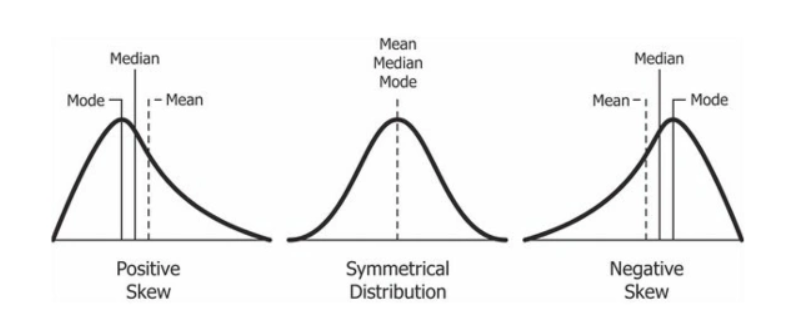

- Now, if the data is not normally distributed than this might affect the model performance.
- Here we try to transform the negative/positive (one side concentrated data) to zero skewed data.

,col1,col2,col3,col4
0,1.968334,0.562485,0.263445,2.593952
1,2.074368,0.221635,0.790043,1.934085


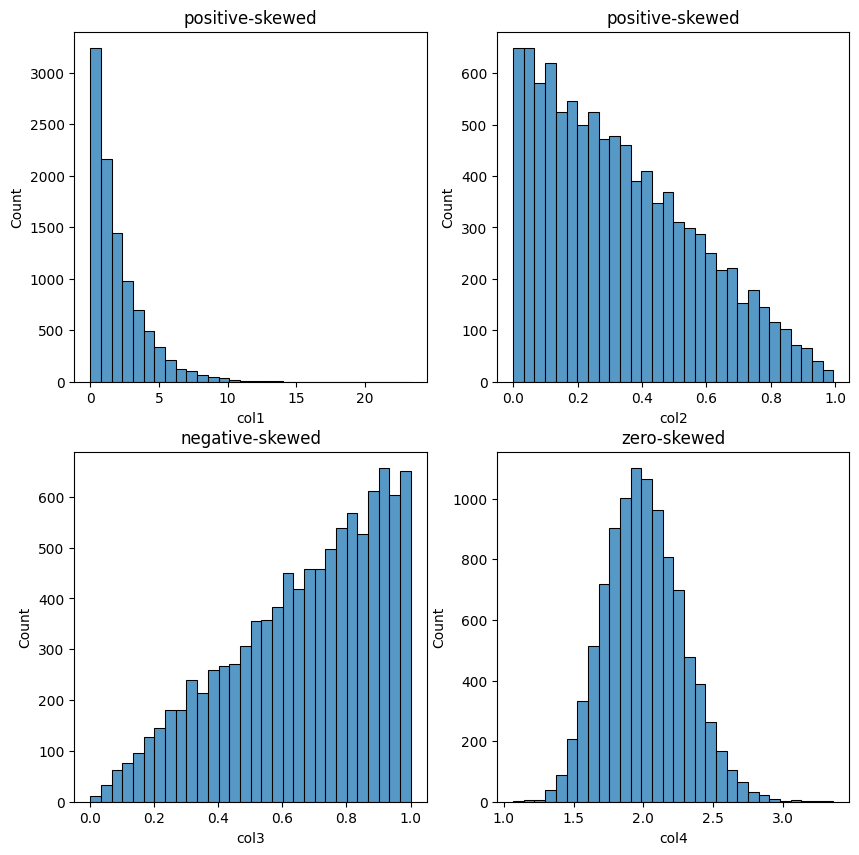

In [36]:
# Sample Generated Skewed Data:
population = np.random.exponential(scale=2, size=10000)

data = {
    'col1' : population,
    'col2' : np.random.beta(a=1, b=2, size=10000),
    'col3' : np.random.beta(a=2, b=1, size=10000),
    'col4' : [np.mean(np.random.choice(population, size=50)) for _ in range(0, 10000)] # near to normally distri (zero skewed)
}
skewness_types = ['positive-skewed', 'positive-skewed', 'negative-skewed', 'zero-skewed']

df = pd.DataFrame(data)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for ax, col, title in zip(axes.ravel(), df.columns, skewness_types):
    sns.histplot(df[col], bins=30, ax=ax)
    ax.set_title(title)
df.head(2)

In [37]:
# Calculating Skewness:
df.skew()

col1    1.999799
col2    0.582413
col3   -0.577413
col4    0.304607
dtype: float64

- We will transform this skewed data to nearly zero-skewed using various transformation methods available in sklearn-preprocesing...

In [76]:
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

Transformation methods:

1. Log Transformation.
2. square root Transformation.
3. boxcox Transformation.
4. yeo-johnson Transformation.
5. Quantile Transformation

col1   -0.09737
dtype: float64

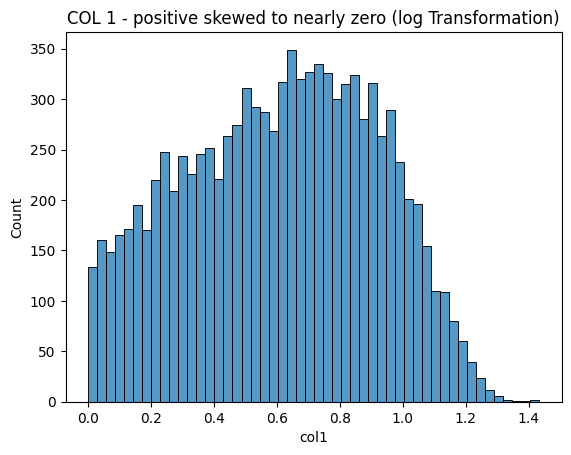

In [75]:
# 1. Log Transformation:
ft = FunctionTransformer(np.log1p)
transformed_col = ft.fit_transform(df['col1'])

sns.histplot(transformed_col, bins=50)
plt.title('COL 1 - positive skewed to nearly zero (log Transformation)')
pd.DataFrame(transformed_col).skew()

col1   -0.294831
dtype: float64

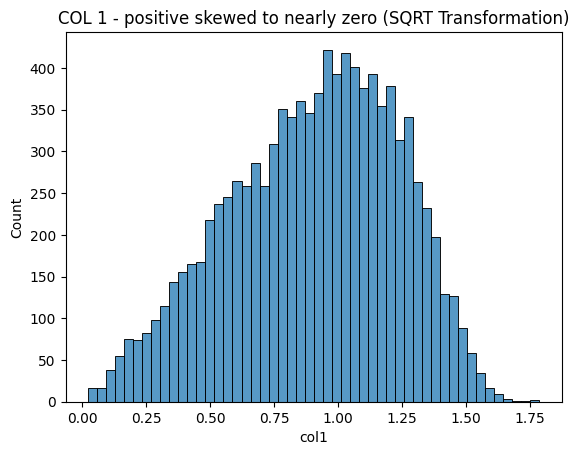

In [74]:
# 2. Square Root Transformation:
ft = FunctionTransformer(np.sqrt)
transformed_col1 = ft.fit_transform(df['col1'])

sns.histplot(transformed_col1, bins=50)
plt.title('COL 1 - positive skewed to nearly zero (SQRT Transformation)')
pd.DataFrame(transformed_col1).skew()